# The Precambrian paleogeography of Laurentia

This noteboook contains code associated with the development of figures for the manuscript chapter on Laurentia written by N. Swanson-Hysell for the book *“Ancient Supercontinents and the Paleogeography of the Earth.”*

In [1]:
import pandas as pd
#from tabulate import tabulate
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import NaturalEarthFeature, COLORS
import numpy as np
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

duluth_lat = 46.7867
duluth_lon = 92.1005 + 180

In [2]:
all_poles = pd.read_excel('Data/Leirubakki_Laurentia.xlsx')

In [3]:
all_poles_A = all_poles[all_poles['Grade']=='A']
all_poles_B = all_poles[all_poles['Grade']=='B']

## Figure 1

Notes relevant to the construction of the figure: 

Shapefiles for the Whitmeyer and Karlstrom (2007) where downloaded from files developed from rasters of that paper by the CENTRAL EASTERN UNITED STATES - SEISMIC SOURCE CHARACTERIZATION FOR NUCLEAR FACILITIES project (http://www.ceus-ssc.com/Report/GIS.html). These files were updated by merging the SW sediments atop the Superior craton to be part of the Superior craton (since we are interested in basement) and by dividing the West and East Superior craton. This division was done using the Geological Map of North America shapefiles (https://ngmdb.usgs.gov/gmna/) which includes faults which correspond with the southeastern boundary of the Kapuskasing Structural Zone (most notably the Ivanhoe Lake shear zone).

The Whitmeyer and Karlstom (2007) tectonic model for the growth of Laurentia has the following units which are defined in the shapefile. For our simplified representation, we will break these into 3 main categories: 1a) Archean cratons, 1b) reworked Archean crust, 2) Paleoproterozoic terranes 3) Mesoproterozoic terranes.*

- < 0.78 Ga Windermere Supergroup 
- '> 2.5 Ga Archean crust' | 1a
- 1.2 - 1.1 Ga Midcontinent rift system | 3
- 1.3 - 0.95 Ga granitoids | 3
- 1.3 - 1.0 Ga collisional orogens | 3
- 1.45 - 1.35 Ga granitoids | 3
- 1.55 - 1.35 Ga juvenile crust | 3
- 1.65 - 1.60 Ga granitoids | 2
- 1.69 - 1.65 Ga juvenile crust | 2
- 1.72 - 1.68 Ga granitoids | 2
- 1.76 - 1.72 Ga juvenile crust | 2
- 1.80 - 1.76 Ga juvenile arcs | 2
- 1.9 - 1.8 Ga reworked Archean crust | 1b
- 2.0 - 1.8 Ga juvenile arcs | 2
- 2.0 - 1.8 Ga juvenile orogens | 2
- 2.5 - 2.0 Ga miogeoclinal sediments | 1a
- approx 1.70 Ga quartzite deposits | 2
- approx. 1.65 Ga quartzite deposits | 2
- Basin | lightyellow (merging them into the underlying terrane)
- Eastern rift basins | not plotted

In [4]:
COLORS

{'land': array([0.9375  , 0.9375  , 0.859375]),
 'land_alt1': array([0.859375, 0.859375, 0.859375]),
 'water': array([0.59375   , 0.71484375, 0.8828125 ])}

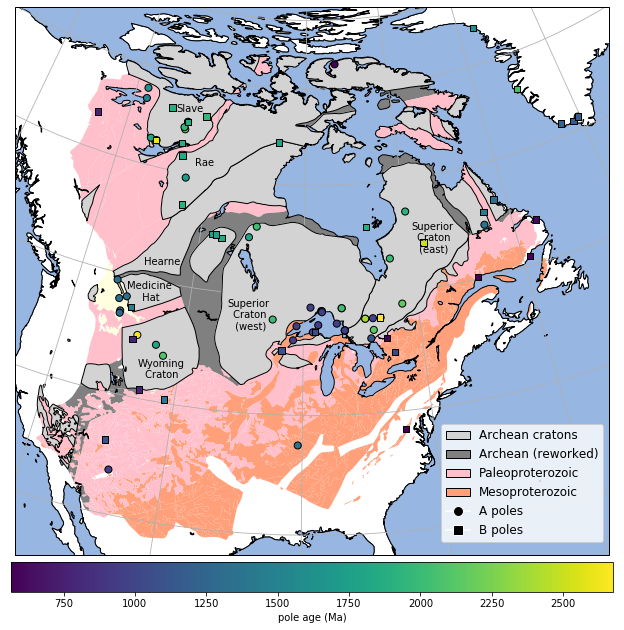

In [5]:
central_lat = duluth_lat
central_lon = duluth_lon
extent = [duluth_lon-30, duluth_lon+28, duluth_lat-22, duluth_lat+32]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

land = NaturalEarthFeature(category='physical', name='land',
                            scale='50m', facecolor=COLORS['land'])
ocean = NaturalEarthFeature(category='physical', name='ocean',
                            scale='50m', facecolor=COLORS['water'])
lakes = NaturalEarthFeature(category='physical', name='lakes',
                            scale='50m', facecolor=COLORS['water'])

ax.add_feature(land, facecolor='white',edgecolor='black')

shpfilename = './Data/Whitmeyer2007_GIS/Whitmeyer2007.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=99)


ax.gridlines()
ax.add_feature(lakes, edgecolor='black')
ax.add_feature(ocean, edgecolor='black')

A_pole_locales = ax.scatter(all_poles_A.SLONG.tolist(), all_poles_A.SLAT.tolist(),
           c=all_poles_A['nominal age'].tolist(),
           edgecolors='black', s=50,
           transform=ccrs.Geodetic(),zorder=100)

B_pole_locales = ax.scatter(all_poles_B.SLONG.tolist(), all_poles_B.SLAT.tolist(),
           c=all_poles_B['nominal age'].tolist(),
           edgecolors='black', s=40, marker='s',
           transform=ccrs.Geodetic(),zorder=100)

plt.text(-97, 47, 'Superior\n Craton\n (west)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-72, 53, 'Superior\n Craton\n (east)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-107,42, 'Wyoming\n Craton',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-110.25,48.25, 'Medicine\n Hat',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-109.5,51.5, 'Hearne',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-106,61, 'Rae',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-110,66, 'Slave',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)


legend_elements = [Patch(facecolor='lightgrey', edgecolor='k',
                         label='Archean cratons'),
                   Patch(facecolor='grey', edgecolor='k',
                         label='Archean (reworked)'),
                    Patch(facecolor='pink', edgecolor='k',
                         label='Paleoproterozoic'),
                    Patch(facecolor='LightSalmon', edgecolor='k',
                         label='Mesoproterozoic'),
                   Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=10)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.25), fancybox=True, fontsize = 12)


plt.colorbar(B_pole_locales,orientation='horizontal',pad=0.01,shrink=0.9,label='pole age (Ma)')
plt.savefig('./Figures/Fig1_map.pdf')
plt.show()

## Split poles by craton
Prior to the amalgamation of the Archean cratons of Laurentia ca. 1.85 Ga, I will consider each of the cratons individually. These cratons are coded out in the *Terrane* field:
- Laurentia-Slave
- Laurentia-Wyoming
- Laurentia-Rae
- Laurentia-Greenland-Nain
- Laurentia-Superior(East)
- Laurentia-Superior(West)
- Laurentia-Superior

Additionally, there are blocks of Laurentia that have undergone subsequent rotations that need to be considered as distinct from the main Laurentia craton and rotated to the main craton in order to be used for tectonic reconstruction:
- Laurentia-Greenland
- Laurentia-Scotland
- Laurentia-Svalbard

In [6]:
all_poles['Terrane'].unique()

array(['Laurentia-Superior(East)', 'Laurentia-Superior(West)',
       'Laurentia-Superior', 'Laurentia-Wyoming',
       'Laurentia-Trans-Hudson orogen', 'Laurentia-Rae',
       'Laurentia-Slave', 'Laurentia', 'Laurentia-Greenland',
       'Laurentia-Greenland-Nain', 'Laurentia-Scotland',
       'Laurentia-Svalbard'], dtype=object)

In [31]:
Laur_poles_A = all_poles_A[all_poles_A['Terrane']=='Laurentia']
Laur_poles_A_plon = Laur_poles_A.PLONG.tolist()
Laur_poles_A_plat = Laur_poles_A.PLAT.tolist()
Laur_poles_A_age = Laur_poles_A['nominal age'].tolist()
Laur_poles_A_a95 = Laur_poles_A.A95.tolist()

Laur_poles_B = all_poles_B[all_poles_B['Terrane']=='Laurentia']
Laur_poles_B = Laur_poles_B[Laur_poles_B['nominal age']>700]
Laur_poles_B_plon = Laur_poles_B.PLONG.tolist()
Laur_poles_B_plat = Laur_poles_B.PLAT.tolist()
Laur_poles_B_age = Laur_poles_B['nominal age'].tolist()
Laur_poles_B_a95 = Laur_poles_B.A95.tolist()

Laur_Slave_poles_A = all_poles_A[all_poles_A['Terrane']=='Laurentia-Slave']
Laur_Slave_poles_A_plon = Laur_Slave_poles_A.PLONG.tolist()
Laur_Slave_poles_A_plat = Laur_Slave_poles_A.PLAT.tolist()
Laur_Slave_poles_A_age = Laur_Slave_poles_A['nominal age'].tolist()
Laur_Slave_poles_A_a95 = Laur_Slave_poles_A.A95.tolist()

Laur_Slave_poles_B = all_poles_B[all_poles_B['Terrane']=='Laurentia-Slave']
Laur_Slave_poles_B_plon = Laur_Slave_poles_B.PLONG.tolist()
Laur_Slave_poles_B_plat = Laur_Slave_poles_B.PLAT.tolist()
Laur_Slave_poles_B_age = Laur_Slave_poles_B['nominal age'].tolist()
Laur_Slave_poles_B_a95 = Laur_Slave_poles_B.A95.tolist()

Laur_Wyoming_poles_A = all_poles_A[all_poles_A['Terrane']=='Laurentia-Wyoming']
Laur_Wyoming_poles_A_plon = Laur_Wyoming_poles_A.PLONG.tolist()
Laur_Wyoming_poles_A_plat = Laur_Wyoming_poles_A.PLAT.tolist()
Laur_Wyoming_poles_A_age = Laur_Wyoming_poles_A['nominal age'].tolist()
Laur_Wyoming_poles_A_a95 = Laur_Wyoming_poles_A.A95.tolist()

Laur_Wyoming_poles_B = all_poles_B[all_poles_B['Terrane']=='Laurentia-Wyoming']
Laur_Wyoming_poles_B_plon = Laur_Wyoming_poles_B.PLONG.tolist()
Laur_Wyoming_poles_B_plat = Laur_Wyoming_poles_B.PLAT.tolist()
Laur_Wyoming_poles_B_age = Laur_Wyoming_poles_B['nominal age'].tolist()
Laur_Wyoming_poles_B_a95 = Laur_Wyoming_poles_B.A95.tolist()

Laur_Rae_poles_A = all_poles_A[all_poles_A['Terrane']=='Laurentia-Rae']
Laur_Rae_poles_A_plon = Laur_Rae_poles_A.PLONG.tolist()
Laur_Rae_poles_A_plat = Laur_Rae_poles_A.PLAT.tolist()
Laur_Rae_poles_A_age = Laur_Rae_poles_A['nominal age'].tolist()
Laur_Rae_poles_A_a95 = Laur_Rae_poles_A.A95.tolist()

Laur_Rae_poles_B = all_poles_B[all_poles_B['Terrane']=='Laurentia-Rae']
Laur_Rae_poles_B_plon = Laur_Rae_poles_B.PLONG.tolist()
Laur_Rae_poles_B_plat = Laur_Rae_poles_B.PLAT.tolist()
Laur_Rae_poles_B_age = Laur_Rae_poles_B['nominal age'].tolist()
Laur_Rae_poles_B_a95 = Laur_Rae_poles_B.A95.tolist()

Laur_Nain_poles_A = all_poles_A[all_poles_A['Terrane']=='Laurentia-Greenland-Nain']
Laur_Nain_poles_A_plon = Laur_Nain_poles_A.PLONG.tolist()
Laur_Nain_poles_A_plat = Laur_Nain_poles_A.PLAT.tolist()
Laur_Nain_poles_A_age = Laur_Nain_poles_A['nominal age'].tolist()
Laur_Nain_poles_A_a95 = Laur_Nain_poles_A.A95.tolist()

Laur_Nain_poles_B = all_poles_B[all_poles_B['Terrane']=='Laurentia-Greenland-Nain']
Laur_Nain_poles_B_plon = Laur_Nain_poles_B.PLONG.tolist()
Laur_Nain_poles_B_plat = Laur_Nain_poles_B.PLAT.tolist()
Laur_Nain_poles_B_age = Laur_Nain_poles_B['nominal age'].tolist()
Laur_Nain_poles_B_a95 = Laur_Nain_poles_B.A95.tolist()

Laur_Superior_poles_A = all_poles_A[all_poles_A['Terrane']=='Laurentia-Superior']
Laur_Superior_poles_A_plon = Laur_Superior_poles_A.PLONG.tolist()
Laur_Superior_poles_A_plat = Laur_Superior_poles_A.PLAT.tolist()
Laur_Superior_poles_A_age = Laur_Superior_poles_A['nominal age'].tolist()
Laur_Superior_poles_A_a95 = Laur_Superior_poles_A.A95.tolist()

Laur_Superior_poles_B = all_poles_B[all_poles_B['Terrane']=='Laurentia-Superior']
Laur_Superior_poles_B_plon = Laur_Superior_poles_B.PLONG.tolist()
Laur_Superior_poles_B_plat = Laur_Superior_poles_B.PLAT.tolist()
Laur_Superior_poles_B_age = Laur_Superior_poles_B['nominal age'].tolist()
Laur_Superior_poles_B_a95 = Laur_Superior_poles_B.A95.tolist()

Laur_SuperiorE_poles_A = all_poles_A[all_poles_A['Terrane']=='Laurentia-Superior(East)']
Laur_SuperiorE_poles_A_plon = Laur_SuperiorE_poles_A.PLONG.tolist()
Laur_SuperiorE_poles_A_plat = Laur_SuperiorE_poles_A.PLAT.tolist()
Laur_SuperiorE_poles_A_age = Laur_SuperiorE_poles_A['nominal age'].tolist()
Laur_SuperiorE_poles_A_a95 = Laur_SuperiorE_poles_A.A95.tolist()

Laur_SuperiorE_poles_B = all_poles_B[all_poles_B['Terrane']=='Laurentia-Superior(West)']
Laur_SuperiorE_poles_B_plon = Laur_SuperiorE_poles_B.PLONG.tolist()
Laur_SuperiorE_poles_B_plat = Laur_SuperiorE_poles_B.PLAT.tolist()
Laur_SuperiorE_poles_B_age = Laur_SuperiorE_poles_B['nominal age'].tolist()
Laur_SuperiorE_poles_B_a95 = Laur_SuperiorE_poles_B.A95.tolist()

Laur_SuperiorW_poles_A = all_poles_A[all_poles_A['Terrane']=='Laurentia-Superior(West)']
Laur_SuperiorW_poles_A_plon = Laur_SuperiorW_poles_A.PLONG.tolist()
Laur_SuperiorW_poles_A_plat = Laur_SuperiorW_poles_A.PLAT.tolist()
Laur_SuperiorW_poles_A_age = Laur_SuperiorW_poles_A['nominal age'].tolist()
Laur_SuperiorW_poles_A_a95 = Laur_SuperiorW_poles_A.A95.tolist()

Laur_SuperiorW_poles_B = all_poles_B[all_poles_B['Terrane']=='Laurentia-Superior(East)']
Laur_SuperiorW_poles_B_plon = Laur_SuperiorW_poles_B.PLONG.tolist()
Laur_SuperiorW_poles_B_plat = Laur_SuperiorW_poles_B.PLAT.tolist()
Laur_SuperiorW_poles_B_age = Laur_SuperiorW_poles_B['nominal age'].tolist()
Laur_SuperiorW_poles_B_a95 = Laur_SuperiorW_poles_B.A95.tolist()

Laur_THO_poles_A = all_poles_A[all_poles_A['Terrane']=='Laurentia-Trans-Hudson orogen']
Laur_THO_poles_A_plon = Laur_THO_poles_A.PLONG.tolist()
Laur_THO_poles_A_plat = Laur_THO_poles_A.PLAT.tolist()
Laur_THO_poles_A_age = Laur_THO_poles_A['nominal age'].tolist()
Laur_THO_poles_A_a95 = Laur_THO_poles_A.A95.tolist()

Laur_THO_poles_B = all_poles_B[all_poles_B['Terrane']=='Laurentia-Trans-Hudson orogen']
Laur_THO_poles_B_plon = Laur_THO_poles_B.PLONG.tolist()
Laur_THO_poles_B_plat = Laur_THO_poles_B.PLAT.tolist()
Laur_THO_poles_B_age = Laur_THO_poles_B['nominal age'].tolist()
Laur_THO_poles_B_a95 = Laur_THO_poles_B.A95.tolist()

## Plot Laurentia poles post-Paleoproterozoic amalgamation

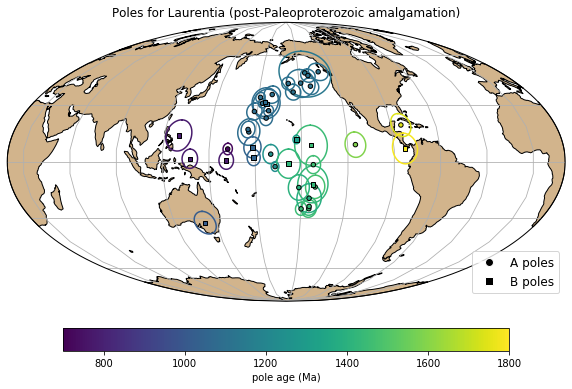

In [30]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_poles_A_plon,Laur_poles_A_plat,Laur_poles_A_a95,
                          Laur_poles_A_age,700,1800,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_poles_B_plon,Laur_poles_B_plat,Laur_poles_B_a95,
                          Laur_poles_B_age,700,1800,marker='s')
plt.title('Poles for Laurentia (post-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
plt.savefig('./Figures/Laurentia_poles.pdf')
plt.show()

## Plots for Archean cratons

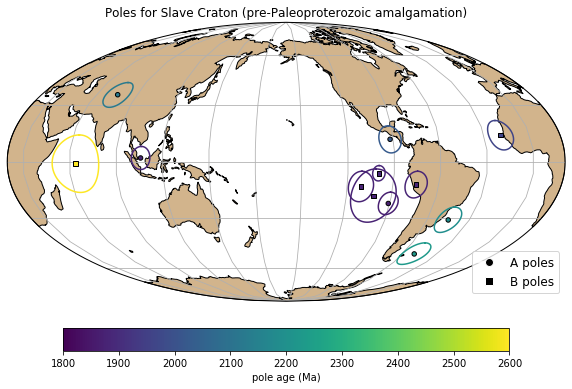

In [13]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_A_plon,Laur_Slave_poles_A_plat,Laur_Slave_poles_A_a95,
                          Laur_Slave_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_B_plon,Laur_Slave_poles_B_plat,Laur_Slave_poles_B_a95,
                          Laur_Slave_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Slave Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
plt.savefig('./Figures/Laurentia_Slave_poles.pdf')
plt.show()

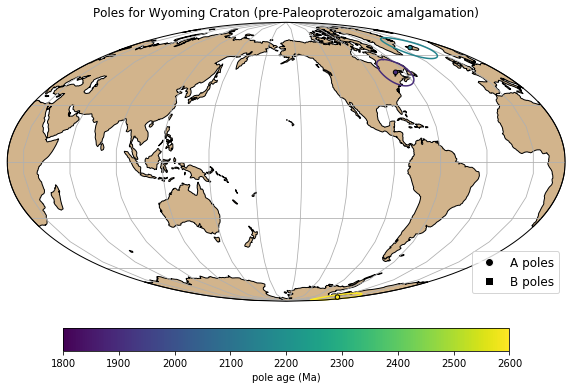

In [17]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_A_plon,
                          Laur_Wyoming_poles_A_plat,Laur_Wyoming_poles_A_a95,
                          Laur_Wyoming_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_B_plon,
                          Laur_Wyoming_poles_B_plat,Laur_Wyoming_poles_B_a95,
                          Laur_Wyoming_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Wyoming Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
plt.savefig('./Figures/Laurentia_Wyoming_poles.pdf')
plt.show()

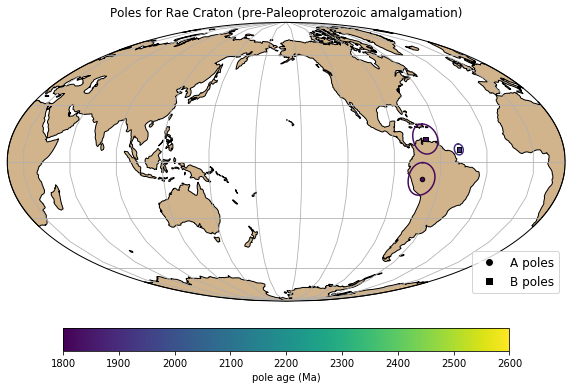

In [21]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_A_plon,Laur_Rae_poles_A_plat,Laur_Rae_poles_A_a95,
                          Laur_Rae_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_B_plon,Laur_Rae_poles_B_plat,Laur_Rae_poles_B_a95,
                          Laur_Rae_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Rae Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
plt.savefig('./Figures/Laurentia_Rae_poles.pdf')
plt.show()

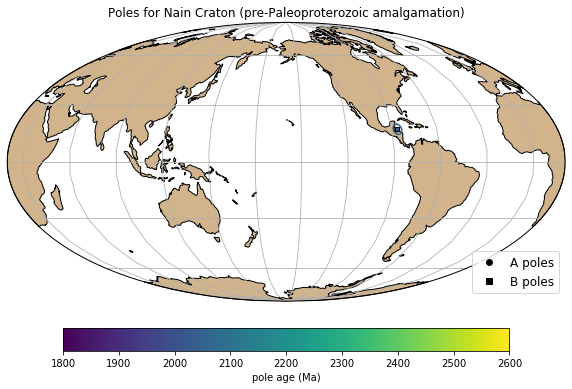

In [23]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Nain_poles_A_plon,Laur_Nain_poles_A_plat,Laur_Nain_poles_A_a95,
                          Laur_Nain_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Nain_poles_B_plon,Laur_Nain_poles_B_plat,Laur_Nain_poles_B_a95,
                          Laur_Nain_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Nain Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
plt.savefig('./Figures/Laurentia_Nain_poles.pdf')
plt.show()

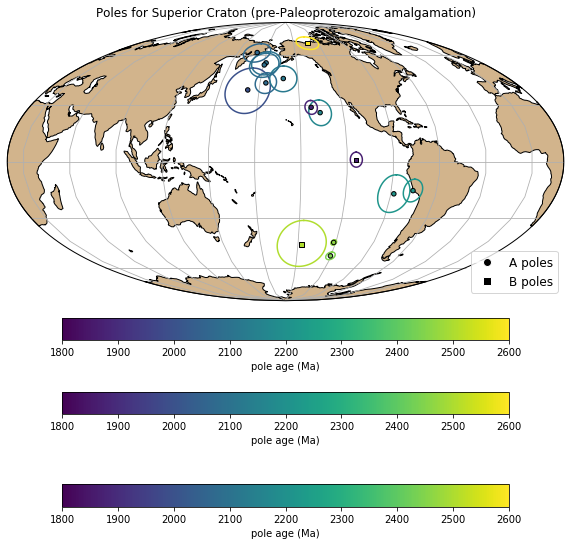

In [27]:
#NEED TO IMPROVE TO DEAL WITH SUPERIOR ROTATION
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Superior_poles_A_plon,Laur_Superior_poles_A_plat,Laur_Superior_poles_A_a95,
                          Laur_Superior_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Superior_poles_B_plon,Laur_Superior_poles_B_plat,Laur_Superior_poles_B_a95,
                          Laur_Superior_poles_B_age,1800,2600,marker='s')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorE_poles_A_plon,Laur_SuperiorE_poles_A_plat,Laur_SuperiorE_poles_A_a95,
                          Laur_SuperiorE_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorE_poles_B_plon,Laur_SuperiorE_poles_B_plat,Laur_SuperiorE_poles_B_a95,
                          Laur_SuperiorE_poles_B_age,1800,2600,marker='s')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorW_poles_A_plon,Laur_SuperiorW_poles_A_plat,Laur_SuperiorW_poles_A_a95,
                          Laur_SuperiorW_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorW_poles_B_plon,Laur_SuperiorW_poles_B_plat,Laur_SuperiorW_poles_B_a95,
                          Laur_SuperiorW_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Superior Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
plt.savefig('./Figures/Laurentia_Superior_poles.pdf')
plt.show()

## Superior craton poles

### Molson dykes B+C2
The pole that is used is that calculated within Evans and Halls (2010). It is unclear whether the Molson dykes pole from the West Superior Craton should be corrected into East Superior Craton coordinates or not as the age of that rotation is not well-constrained. The dates associated with the poles come from Halls and Heaman (2000) in which a U-Pb zircon concordia intercept date of 1877 (+7/-4) was published and an another associated dike (without direct paleomagnetic data) has a date of 1884 ± 2 Ma (Heaman et al. 1986).

In [3]:
poles_Laur_SupW = A_poles[A_poles['CRATON']=='Laurentia-Superior(West)']
poles_Laur_SupE = A_poles[A_poles['CRATON']=='Laurentia-Superior(East)']

Evans and Halls (2010) propose that an Euler rotation of (51º N, 85º W, −14º CCW) be used reconstruct western Superior relative to eastern Superior and interpret that the rotation occured in the time interval of 2.07 to 1.87 Ga. They develop combined poles for the units that exist on both sides of the Kapuskasing Structural Zone. These combined poles are imported below.

In [25]:
Superior_poles = pd.read_excel('./data/Evans2010_Superior_poles.xlsx')
Superior_poles.head()

,Pole,Age,Age_uncertainty,Plat_W_frame,Plon_W_frame,Plat_E_frame,Plon_E_frame,A95,1234567,Q,References
0,Otto Stock lamproph.,2680.0,≤2680 ± 1,-62.0,45.0,-69.0,47.0,5.0,111c101,6,Pullaiah and Irving (1975) and Buchan et\nal. ...
1,Ptarm.-Mistassinia,2505.0,2505 ± 2,-52.4,229.9,-45.3,213.0,13.8,1010101,4,"Fahrig et al. (1986), Buchan et al. (1998), re..."
2,Matachewan R,2459.5,2473–2446,-48.1,257.4,-44.1,238.3,1.6,111C101,6,See text; Evans and Halls (2010) (W + E)
3,Matachewan N,2446.0,2446 ± 3,-55.6,261.5,-52.3,239.5,2.4,111C101,6,See text; Evans and Halls (2010) (W + E)
4,Nipissing N1 (B),2217.0,2217 ± 4,-16.0,286.0,-17.0,272.0,10.0,111C111,7,Buchan et al. (2000) (E)


In [27]:
Superior_poles.columns

Index([           'Pole',             'Age', 'Age_uncertainty',
          'Plat_W_frame',    'Plon_W_frame',    'Plat_E_frame',
          'Plon_E_frame',             'A95',           1234567,
                     'Q',      'References'],
      dtype='object')

<ErrorbarContainer object of 3 artists>

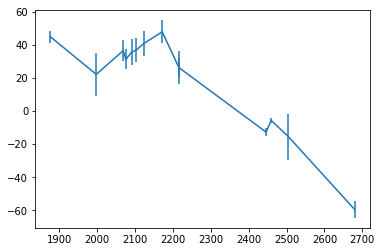

In [31]:
Superior_West_Paleolats = []
Superior_West_Paleolat_errors = []
Superior_West_Paleolatitudes
Superior_West_time = []

for n in Superior_poles.index:
    Duluth_paleolat = ipmag.lat_from_pole(duluth_lon,duluth_lat,
                                          Superior_poles['Plon_W_frame'][n],
                                          Superior_poles['Plat_W_frame'][n])
    Superior_West_Paleolats.append(Duluth_paleolat)
    Superior_West_Paleolat_errors.append(Superior_poles['A95'][n])
    Superior_West_time.append(Superior_poles['Age'][n])
    
plt.errorbar(Superior_West_time,Superior_West_Paleolats,yerr=Superior_West_Paleolat_errors)

In [29]:
#print(tabulate(A_poles, headers='keys', tablefmt='pipe'))

|pole| CRATON                   | ROCKNAME                                            | GPMDB-result#   |   SLAT |   SLONG |   PLAT |   PLONG |      A95 |   1 |   2 |   3 | 4   |   5 |   6 |   7 |   Q(7) |   nominal age |   min |   max | POLE AUTHORS                                | YEAR   | Nordic_Grade   |
|---:|:-------------------------|:----------------------------------------------------|:----------------|-------:|--------:|-------:|--------:|---------:|----:|----:|----:|:----|----:|----:|----:|-------:|--------------:|------:|------:|:--------------------------------------------|:-------|:---------------|
|  0 | Laurentia                | Franklin LIP grand mean                             | MEAN            |  73    |  275.4  |    6.7 |   162.1 |  3       |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |         724   |   721 |   727 | Denyszyn et al.                             | 2009   | A              |
|  1 | Laurentia                | Michipicoten Island Fm                              | NEW             |  47.7  |  274.3  |   17   |   174.7 |  4.4     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        1084   |  1083 |  1085 | Fairchild et al.                            | 2017   | A              |
|  2 | Laurentia                | Lake Shore Traps                                    | 9506            |  47.6  |  271.9  |   23.1 |   186.4 |  4       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1087   |  1085 |  1089 | Kulakov et al.                              | 2013   | A              |
|  3 | Laurentia                | Central Arizona diabases -N                         | NEW             |  33.7  |  249.2  |   15.7 |   175.3 |  7.00999 |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        1088   |  1077 |  1099 | Donadini et al.                             | 2011   | A              |
|  4 | Laurentia                | Schroeder Lutsen Basalts                            | NEW             |  47.5  |  269.1  |   27.1 |   187.8 |  3       |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        1090   |  1083 |  1092 | Fairchild et al.                            | 2017   | A              |
|  5 | Laurentia                | Portage Lake Volcanics                              | 9507            |  47    |  271.2  |   26.7 |   178   |  4.69574 |   1 |   1 |   1 | fG  |   1 |   0 |   1 |      6 |        1095   |  1092 |  1098 | Hnat et al.                                 | 2006   | A              |
|  6 | Laurentia                | North Shore lavas -N                                | NEW             |  46.3  |  268.7  |   34.5 |   181.3 |  2.8     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1097   |  1094 |  1100 | Tauxe & Kodama                              | 2009   | A              |
|  7 | Laurentia                | Uppermost Mamainse Point volcanics -N               | NEW             |  47.1  |  275.3  |   31.2 |   183.2 |  2.5     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1098   |  1095 |  1101 | Swanson-Hysell et al.                       | 2014a  | A              |
|  8 | Laurentia                | Mamainse Point volcanics (lower N, upper R)         | 9512            |  47.1  |  275.3  |   36.1 |   189.7 |  4.9     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1100.5 |  1100 |  1101 | Swanson-Hysell et al.                       | 2014a  | A              |
|  9 | Laurentia                | Lower Mamainse Point volcanics -R2                  | 9511            |  47.1  |  275.3  |   37.5 |   205.2 |  4.5     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1105   |  1103 |  1107 | Swanson-Hysell et al.                       | 2014a  | A              |
| 10 | Laurentia                | Upper Osler volcanics -R                            | 9514            |  48.7  |  272.4  |   42.5 |   201.6 |  3.7     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1105   |  1103 |  1107 | Swanson-Hysell et al.                       | 2014b  | A              |
| 11 | Laurentia                | Middle Osler volcanics -R                           | NEW             |  48.8  |  272.4  |   42.7 |   211.3 |  8.2     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1106.5 |  1103 |  1110 | Swanson-Hysell et al.                       | 2014b  | A              |
| 12 | Laurentia                | Lowermost Mamainse Point volcanics -R1              | 9510            |  47.1  |  275.3  |   49.5 |   227   |  5.3     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1108   |  1105 |  1111 | Swanson-Hysell et al.                       | 2014a  | A              |
| 13 | Laurentia                | Lower Osler volcanics -R                            | 9515            |  48.8  |  272.3  |   40.9 |   218.6 |  4.8     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1108   |  1105 |  1111 | Swanson-Hysell et al.                       | 2014b  | A              |
| 14 | Laurentia                | MEAN Nipigon sills and lavas                        | MEAN            |  49.1  |  270.9  |   47.2 |   217.8 |  4       |   1 |   1 |   1 | c   |   1 |   0 |   1 |      6 |        1111   |  1107 |  1115 | LULEÅ WORKING GROUP                         | 2009   | A              |
| 15 | Laurentia                | Abitibi Dykes                                       | 7193            |  48    |  279    |   48.8 |   215.5 | 14.1     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1141   |  1139 |  1143 | Ernst & Buchan                              | 1993   | A              |
| 16 | Laurentia                | Sudbury Dykes Combined                              | 2175            |  46.3  |  278.6  |   -2.5 |   192.8 |  2.5     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1237   |  1232 |  1242 | Palmer et al. (age: Dudás et al. 1994)      | 1977   | A              |
| 17 | Laurentia                | Mackenzie dykes grand mean                          | MEAN            |  65    |  250    |    4   |   190   |  5       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1267   |  1265 |  1269 | Buchan et al.                               | 2000   | A              |
| 18 | Laurentia                | Pilcher, Garnet Range and Libby Fms                 | 9030            |  46.7  |  246.4  |  -19.2 |   215.3 |  7.7     |   1 |   1 |   1 | f   |   1 |   0 |   1 |      6 |        1384.5 |  1362 |  1407 | Elston et al.                               | 2002   | A              |
| 19 | Laurentia                | McNamara Formation                                  | 9031            |  46.9  |  246.4  |  -13.5 |   208.3 |  6.7     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1401   |  1395 |  1407 | Elston et al.                               | 2002   | A              |
| 20 | Laurentia                | Purcell Lava                                        | 9037            |  49.4  |  245.1  |  -23.6 |   215.6 |  4.8     |   1 |   1 |   1 | f   |   1 |   0 |   0 |      5 |        1443   |  1436 |  1450 | Elston et al.                               | 2002   | A              |
| 21 | Laurentia                | Snowslip Formation                                  | 9038            |  47.9  |  245.9  |  -24.9 |   210.2 |  3.5     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1449.5 |  1436 |  1463 | Elston et al.                               | 2002   | A              |
| 22 | Laurentia                | Spokane Formation                                   | 9039            |  48.2  |  246.8  |  -24.8 |   215.5 |  4.7     |   1 |   1 |   1 | f   |   1 |   0 |   1 |      6 |        1457.5 |  1445 |  1470 | Elston et al.                               | 2002   | A              |
| 23 | Laurentia                | Michikamau Intrusion Combined                       | 2274            |  54.5  |  296    |   -1.5 |   217.5 |  4.6669  |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1460   |  1455 |  1465 | Emslie et al.                               | 1976   | A              |
| 24 | Laurentia                | St.Francois Mountains Acidic Rocks                  | 8932            |  37.5  |  269.5  |  -13.2 |   219   |  6.13188 |   1 |   1 |   1 | cfg |   1 |   0 |   1 |      6 |        1476   |  1460 |  1492 | Meert & Stuckey                             | 2002   | A              |
| 25 | Laurentia                | Western Channel Diabase                             | 2669            |  66.4  |  242.2  |    9   |   245   |  6.62269 |   1 |   1 |   0 | C   |   1 |   0 |   1 |      5 |        1590   |  1587 |  1593 | Irving et al. (age: Hamilton & Buchan 2010) | 1972   | A              |
| 26 | Laurentia                | Cleaver dykes                                       | 9139            |  67.5  |  241.97 |   19.4 |   276.7 |  6.1     |   1 |   1 |   1 | Cc  |   1 |   0 |   1 |      6 |        1740   |  1736 |  1745 | Irving et al.                               | 2004   | A              |
| 27 | Laurentia-Greenland      | South Qoroq Intrusion                               | 6610            |  61.15 |  314.6  |   41.8 |   215.9 | 13.1042  |   1 |   1 |   1 | C   |   0 |   0 |   1 |      5 |        1163   |  1161 |  1165 | Piper                                       | 1992   | A              |
| 28 | Laurentia-Rae            | Martin Fm                                           | 2659            |  59.6  |  251.4  |   -9   |   288   |  8.51176 |   1 |   1 |   0 | f   |   1 |   1 |   0 |      5 |        1818   |  1814 |  1822 | Evans & Bingham (age: Morelli et al. 2009)  | 1973   | A              |
| 29 | Laurentia-Slave          | MEAN Pearson A/Peninsular sill/Kilohigok basin sill | MEAN            |  65    |  250    |  -22   |   269   |  6       |   1 |   1 |   0 | C   |   1 |   1 |   1 |      6 |        1870   |  1866 |  1874 | Mitchell et al.                             | 2010   | A              |
| 30 | Laurentia-Slave          | Ghost dikes                                         | 9485            |  62.6  |  244.6  |    2   |   254   |  6       |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |        1887   |  1878 |  1892 | Buchan et al.                               | 2016   | A              |
| 31 | Laurentia-Slave          | Lac de Gras dykes                                   | 9404            |  64.4  |  249.6  |   11.8 |   267.9 |  7.0993  |   1 |   1 |   1 | Cc  |   1 |   0 |   1 |      6 |        2026   |  2021 |  2031 | Buchan et al.                               | 2009   | A              |
| 32 | Laurentia-Slave          | Indin dykes                                         | 9484            |  62.5  |  245.6  |   36   |   284   |  7       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2126   |  2108 |  2129 | Buchan et al.                               | 2016   | A              |
| 33 | Laurentia-Slave          | Dogrib dykes                                        | 9406            |  62.5  |  245.5  |  -31   |   315   |  7       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2193   |  2191 |  2195 | Mitchell et al.                             | 2014   | A              |
| 34 | Laurentia-Slave          | Malley dykes                                        | 9405            |  64.2  |  249.8  |  -50.8 |   310   |  6.7     |   1 |   1 |   1 | c   |   1 |   0 |   0 |      5 |        2231   |  2229 |  2233 | Buchan et al.                               | 2012   | A              |
| 35 | Laurentia-Superior(East) | Minto dykes                                         | MEAN            |  57    |  285    |   38.7 |   171.5 | 13.1     |   1 |   1 |   1 | 0   |   1 |   1 |   0 |      5 |        1998   |  1996 |  2000 | Buchan et al. (recalc: Evans & Halls 2010)  | 1998   | A              |
| 36 | Laurentia-Superior(East) | Lac Esprit dykes                                    | MEAN            |  53    |  282    |   62   |   170.5 |  6.4     |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        2069   |  2068 |  2070 | Buchan et al. (recalc: Evans & Halls 2010)  | 2007   | A              |
| 37 | Laurentia-Superior(East) | Biscotasing dykes                                   | MEAN            |  48    |  280    |   26   |   223.9 |  7       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2169.5 |  2167 |  2172 | Evans & Halls                               | 2010   | A              |
| 38 | Laurentia-Superior(East) | Nipissing N1 component                              | MEAN            |  47    |  279    |  -17   |   272   | 10       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2217   |  2213 |  2221 | Buchan et al.                               | 2000   | A              |
| 39 | Laurentia-Superior(East) | Senneterre dykes                                    | MEAN            |  49    |  283    |  -15.3 |   284.3 |  6       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2218   |  2212 |  2224 | Buchan et al.                               | 1993   | A              |
| 40 | Laurentia-Superior(East) | Matachewan dykes N                                  | MEAN            |  48    |  278    |  -52.3 |   239.5 |  2.4     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2446   |  2443 |  2449 | Evans & Halls                               | 2010   | A              |
| 41 | Laurentia-Superior(East) | Matachewan dykes R                                  | MEAN            |  48    |  278    |  -44.1 |   238.3 |  1.6     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2466   |  2443 |  2489 | Evans & Halls                               | 2010   | A              |
| 42 | Laurentia-Superior(West) | Molson dykes B+C2                                   | MEAN            |  55    |  262    |   28.9 |   218   |  3.8     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1878.5 |  1873 |  1884 | Halls & Heaman (recalc: Evans & Halls 2010) | 2000   | A              |
| 43 | Laurentia-Superior(West) | Fort Frances dykes                                  | MEAN            |  48    |  266    |   42.8 |   184.6 |  6.1     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2076.5 |  2072 |  2081 | Halls (recalc: Evans & Halls 2010)          | 1986   | A              |
| 44 | Laurentia-Superior(West) | Cauchon Lake dykes                                  | MEAN            |  56    |  263    |   53.8 |   180.9 |  7.7     |   1 |   1 |   1 | C   |   1 |   0 |   0 |      5 |        2091   |  2089 |  2093 | Halls & Heaman (recalc: Evans & Halls 2010) | 2000   | A              |
| 45 | Laurentia-Superior(West) | Marathon dykes R                                    | MEAN            |  49    |  275    |   55.1 |   182.2 |  7.5     |   1 |   1 |   1 | C   |   1 |   0 |   0 |      5 |        2103.5 |  2101 |  2106 | Halls et al.                                | 2008   | A              |
| 46 | Laurentia-Superior(West) | Marathon dykes N                                    | MEAN            |  49    |  275    |   45.4 |   198.2 |  7.7     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2123.5 |  2121 |  2126 | Halls et al.                                | 2008   | A              |
| 47 | Laurentia-Wyoming        | Sourdough dikes                                     | 9539            |  44.7  | -108.3  |   49.2 |   292   |  8.1     |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |        1899   |  1894 |  1904 | Kilian et al.                               | 2016   | A              |
| 48 | Laurentia-Wyoming        | Rabbit Creek, Powder River, and South Path dikes    | 9496            |  43.9  |  252.8  |   65.5 |   339.2 |  7.6     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2160   |  2152 |  2171 | Kilian et al.                               | 2015   | A              |
| 49 | Laurentia-Wyoming        | Stillwater Complex - C2                             | NEW             |  45.2  |  249.2  |  -83.6 |   335.8 |  4.04231 |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2705   |  2701 |  2709 | Selkin et al.                               | 2008   | A              |

## References cited

\cite{Bates1991a,Berman2007a,Corrigan2009a,Evans2010a,Hoffman1988a,Kilian2016a,Pehrsson2015a,Skipton2016a,St-Onge2009a,Weller2017a}